# Лабораторна Робота №2 
## Чєвтаєв

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
#завантажимо дані
col_names = ['Age', 'Year of operation', 'Number of positive axillary nodes', 'Survival status']
initdata = pd.read_table('Documents/classdata/haberman.data', sep=',', names=col_names)

In [3]:
initdata.head()

,Age,Year of operation,Number of positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# пропущенних значень немає
initdata.isnull().values.any()

False

In [5]:
initdata.head()

,Age,Year of operation,Number of positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
response = initdata['Survival status']
inputvars = initdata.drop(['Survival status'], axis=1)
inputvars.head()

,Age,Year of operation,Number of positive axillary nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [7]:
# бачимо, що пацієнти по віку мають нормальний розподіл
# найбільше операцій припало з 58 до 64
# найбільша кількість паціентів з кількістю axillary nodes меньше ніж 10 
inputvars.hist(column=["Year of operation", "Age", "Number of positive axillary nodes"], figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018623EBBA90>,
      dtype=object)

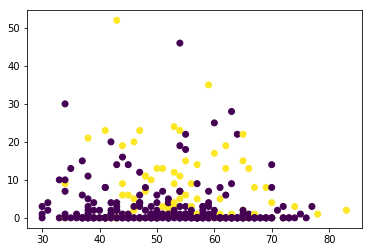

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x=initdata['Age'],y=initdata['Number of positive axillary nodes'],c=initdata['Survival status'])
plt.show()

C:\Users\deboshirbalaganovich\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


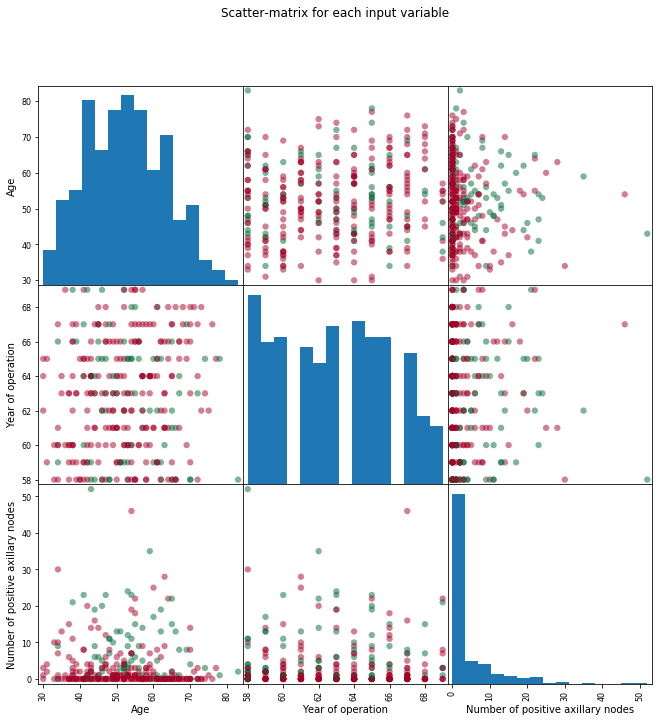

In [9]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

colums = ['Age', 'Year of operation', 'Number of positive axillary nodes']
X = initdata[colums]
y = initdata['Survival status']

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(11, 11), cmap = plt.cm.RdYlGn)

plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')

# Наївний байєсiвський класифiкатор

In [10]:
x_train, x_test, y_train, y_test = train_test_split(inputvars, response, test_size=0.2)

In [11]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))

Accuracy: 0.6935483870967742
F1:  0.8
Confusion Matrix:
  [[38  2]
 [17  5]]
Precision Score:  0.6909090909090909


# Метод k-nn класифікації 

In [13]:
# Метод k-nn класифікації 
# підготуємо данні для викоритсання у k-nn алгоритмі, тому що ми використовуємо еклідову відстань, а при
# такому налаштунку алгоритм чутливий до великих різниць між числовими значеннями данних


sc_X = StandardScaler()
kx_train = sc_X.fit_transform(x_train)
kx_test = sc_X.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,30):
    
    knn_classifier = KNeighborsClassifier(n_neighbors=i, p=2)
    knn_classifier.fit(kx_train, y_train)
    y_pred = knn_classifier.predict(kx_test)
    print(knn_classifier)
    print(y_pred)
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.f1_score(y_test, y_pred))
    scores = cross_val_score(knn_classifier, kx_test, y_test)
    print(scores.mean())
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
[1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 1 1 2 2 1 1 1 2 1 1
 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2]
[[30 10]
 [17  5]]
0.5645161290322581
0.6896551724137931
0.4666666666666666
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[35  5]
 [22  0]]
0.5645161290322581
0.7216494845360825
0.6151515151515151
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
[2 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform')
[1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]
[[38  2]
 [19  3]]
0.6612903225806451
0.7835051546391752
0.6454545454545455
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')
[1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]
[[38  2]
 [18  4]]
0.6774193548387096
0.7916666666666667
0.6454545454545455


In [15]:
from sklearn.neighbors import KNeighborsClassifier

k_scores = []

for i in range(1,30):
    
    knn_classifier = KNeighborsClassifier(n_neighbors=i, p=2)
    knn_classifier.fit(kx_train, y_train)
    y_pred = knn_classifier.predict(kx_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    k_scores.append(acc)

print(k_scores)

[0.5645161290322581, 0.5645161290322581, 0.532258064516129, 0.5967741935483871, 0.5806451612903226, 0.6612903225806451, 0.6774193548387096, 0.6451612903225806, 0.6451612903225806, 0.6451612903225806, 0.6451612903225806, 0.6451612903225806, 0.6774193548387096, 0.6451612903225806, 0.6451612903225806, 0.6451612903225806, 0.6612903225806451, 0.6451612903225806, 0.6612903225806451, 0.6451612903225806, 0.6451612903225806, 0.6612903225806451, 0.6451612903225806, 0.6612903225806451, 0.6612903225806451, 0.6612903225806451, 0.6612903225806451, 0.6612903225806451, 0.6774193548387096]


0.6774193548387096


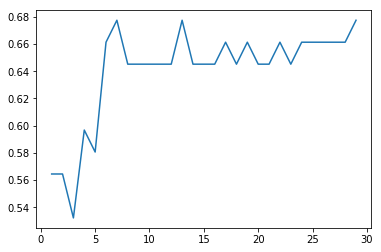

In [16]:
import matplotlib.pyplot as plt
print(max(k_scores))
max_index = k_scores.index(max(k_scores)) + 1

plt.plot(range(1,30), k_scores)

In [17]:
#Використаємо параметр n_neighbors з наших тестів
knn_classifier = KNeighborsClassifier(n_neighbors=max_index, p=2)
knn_classifier.fit(kx_train, y_train)
y_pred = knn_classifier.predict(kx_test)
print(knn_classifier)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
Accuracy: 0.6774193548387096
F1:  0.7872340425531915
Confusion Matrix:
  [[37  3]
 [17  5]]
Precision Score:  0.6851851851851852


# Логістична Регресія

In [18]:
#Спробуємо провести класифікацію за допомогою методу логістичної регресії
from sklearn.linear_model import LogisticRegression



log_reg = LogisticRegression(random_state=3)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))


Accuracy: 0.6774193548387096
F1:  0.7916666666666667
Confusion Matrix:
  [[38  2]
 [18  4]]
Precision Score:  0.6785714285714286


## Створюємо фактор-змінну замість Age

In [19]:
data_with_factor = initdata.copy(deep=True)
# перетворюємо Age на фактор змінну
def age_factor(x):
    if  x < 30:
        return 0
    elif 30 <= x <= 60:
        return 1
    else:
        return 2

data_with_factor['Age'] = initdata['Age'].apply(age_factor)

In [20]:
data_with_factor.head()

,Age,Year of operation,Number of positive axillary nodes,Survival status
0,1,64,1,1
1,1,62,3,1
2,1,65,0,1
3,1,59,2,1
4,1,65,4,1


In [21]:
newresponse = data_with_factor['Survival status']
newinputvars = data_with_factor.drop(['Survival status'], axis=1)
newx_train, newx_test, newy_train, newy_test = train_test_split(newinputvars, newresponse, test_size=0.2)

# Класифікація по новим данним

In [22]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()


gnb.fit(newx_train, newy_train)
newy_pred = gnb.predict(newx_test)

print("Accuracy:",metrics.accuracy_score(newy_test, newy_pred))
print(metrics.confusion_matrix(newy_test, newy_pred))
scores = cross_val_score(gnb, newx_test, newy_test)
print(scores.mean())

print("Accuracy:", metrics.accuracy_score(newy_test, newy_pred))
print("F1: ", metrics.f1_score(newy_test, newy_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(newy_test, newy_pred))
print("Precision Score: ", metrics.precision_score(newy_test, newy_pred))


Accuracy: 0.7580645161290323
[[42  6]
 [ 9  5]]
0.7253968253968255
Accuracy: 0.7580645161290323
F1:  0.8484848484848485
Confusion Matrix:
  [[42  6]
 [ 9  5]]
Precision Score:  0.8235294117647058


[0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323, 0.7580645161290323]
0.7580645161290323
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')
Accuracy: 0.7096774193548387
F1:  0.816326530612245
Confusion Matrix:
  [[40  8]
 [10  4]]
Precision Score:  0.8


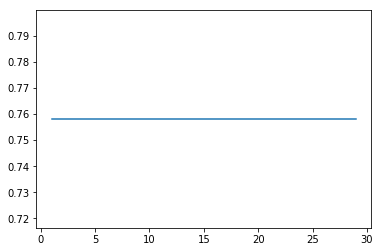

In [23]:
from sklearn.neighbors import KNeighborsClassifier

sc_X = StandardScaler()
kx_train = sc_X.fit_transform(newx_train)
kx_test = sc_X.transform(newx_test)
k_scores = []

for i in range(1,30):
    
    knn_classifier = KNeighborsClassifier(n_neighbors=i, p=2)
    knn_classifier.fit(kx_train, newy_train)
    y_pred = knn_classifier.predict(kx_test)
    acc = metrics.accuracy_score(newy_test, newy_pred)
    k_scores.append(acc)

print(k_scores)
import matplotlib.pyplot as plt
print(max(k_scores))
max_index = k_scores.index(max(k_scores))

plt.plot(range(1,30), k_scores)

knn_classifier = KNeighborsClassifier(n_neighbors=12, p=2)
knn_classifier.fit(kx_train, newy_train)
newy_pred = knn_classifier.predict(kx_test)
print(knn_classifier)
print("Accuracy:", metrics.accuracy_score(newy_test, newy_pred))
print("F1: ", metrics.f1_score(newy_test, newy_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(newy_test, newy_pred))
print("Precision Score: ", metrics.precision_score(newy_test, newy_pred))


In [24]:
log_reg = LogisticRegression(random_state=3)
log_reg.fit(newx_train, newy_train)
newy_pred = log_reg.predict(newx_test)
print(newy_pred)
print("Accuracy:", metrics.accuracy_score(newy_test, newy_pred))
print("F1: ", metrics.f1_score(newy_test, newy_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(newy_test, newy_pred))
print("Precision Score: ", metrics.precision_score(newy_test, newy_pred))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1]
Accuracy: 0.7580645161290323
F1:  0.854368932038835
Confusion Matrix:
  [[44  4]
 [11  3]]
Precision Score:  0.8


# Класифікація по 2 ознакам(розбиття вибірки на підвиборки по фактор змінній)

In [25]:
data3060 = data_with_factor.loc[data_with_factor['Age'] == 1 ]
input3060 = data3060.drop(['Survival status', 'Age'], axis=1)
response3060 = data3060['Survival status']
print(input3060.head())
print(response3060.head())
newx_train, newx_test, newy_train, newy_test = train_test_split(input3060, response3060, test_size=0.2)
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(newx_train, newy_train)
newy_pred = gnb.predict(newx_test)

print("Accuracy:",metrics.accuracy_score(newy_test, newy_pred))
print(metrics.confusion_matrix(newy_test, newy_pred))
scores = cross_val_score(gnb, newx_test, newy_test)
print(scores.mean())



   Year of operation  Number of positive axillary nodes
0                 64                                  1
1                 62                                  3
2                 65                                  0
3                 59                                  2
4                 65                                  4
0    1
1    1
2    1
3    1
4    1
Name: Survival status, dtype: int64
Accuracy: 0.717391304347826
[[28  1]
 [12  5]]
0.6488095238095238


[0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826, 0.717391304347826]
0.717391304347826
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')
Accuracy: 0.6304347826086957
F1:  0.7733333333333333
Confusion Matrix:
  [[29  0]
 [17  0]]
Precision Score:  0.6304347826086957


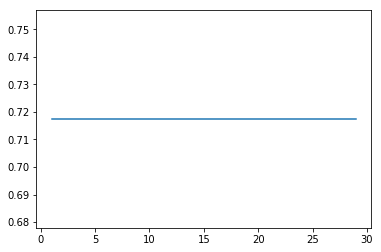

In [26]:
from sklearn.neighbors import KNeighborsClassifier

sc_X = StandardScaler()
kx_train = sc_X.fit_transform(newx_train)
kx_test = sc_X.transform(newx_test)
k_scores = []

for i in range(1,30):
    
    knn_classifier = KNeighborsClassifier(n_neighbors=i, p=2)
    knn_classifier.fit(kx_train, newy_train)
    y_pred = knn_classifier.predict(kx_test)
    acc = metrics.accuracy_score(newy_test, newy_pred)
    k_scores.append(acc)

print(k_scores)
import matplotlib.pyplot as plt
print(max(k_scores))
max_index = k_scores.index(max(k_scores))

plt.plot(range(1,30), k_scores)

knn_classifier = KNeighborsClassifier(n_neighbors=12, p=2)
knn_classifier.fit(kx_train, newy_train)
newy_pred = knn_classifier.predict(kx_test)
print(knn_classifier)
print("Accuracy:", metrics.accuracy_score(newy_test, newy_pred))
print("F1: ", metrics.f1_score(newy_test, newy_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(newy_test, newy_pred))
print("Precision Score: ", metrics.precision_score(newy_test, newy_pred))

In [27]:
log_reg = LogisticRegression(random_state=3)
log_reg.fit(newx_train, newy_train)
newy_pred = log_reg.predict(newx_test)

print("Accuracy:", metrics.accuracy_score(newy_test, newy_pred))
print("F1: ", metrics.f1_score(newy_test, newy_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(newy_test, newy_pred))
print("Precision Score: ", metrics.precision_score(newy_test, newy_pred))

Accuracy: 0.6739130434782609
F1:  0.7887323943661971
Confusion Matrix:
  [[28  1]
 [14  3]]
Precision Score:  0.6666666666666666


# Висновок


LR: 0.754902 (0.042358)
K-nn: 0.715686 (0.044569)
NB: 0.728758 (0.025732)
K-nn з 15 : 0.738562 (0.028112)


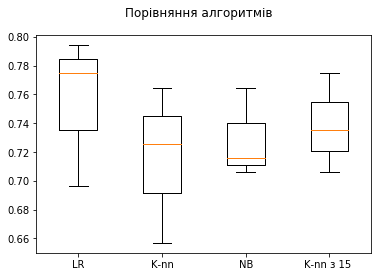

In [28]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('K-nn', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))


results = []
names = []
scoring = 'accuracy'
seed = 6
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=seed)
    cv_results = model_selection.cross_val_score(model, inputvars, response, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#
sc_X = StandardScaler()
knninput = sc_X.fit_transform(inputvars)


knn_classifier = KNeighborsClassifier(n_neighbors=15, p=2)
kfold = model_selection.KFold(n_splits=3, random_state=seed)
cv_results = model_selection.cross_val_score(knn_classifier, knninput, response, cv=kfold, scoring=scoring) 
results.append(cv_results)
names.append("K-nn з 15 ")
msg = "%s: %f (%f)" % ("K-nn з 15 ", cv_results.mean(), cv_results.std())
print(msg)    
#


fig = plt.figure()
fig.suptitle('Порівняння алгоритмів')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Порівняння
Бачимо, що серед всіх моделей найкраще впоралася у більшості випадків класифікація за допомогою лінійної регресії, після неї K-nn метод.
На початковій виборці найкраще показав себе K-nn метод із підбранною кількустю сусідів.
Коли ми розбили виборку за фактор змінними, точність моделі підвищилася порівняно із данними з фактор змінною, але не на багато. Загалом точність моделі не покращилась із розбиттям на фактор змінні і створенням фактор змінної.


# Спам фільтр на основі наївного класифікатора

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('Documents/classdata/spam-text-message-classification/spam.csv')
response = data['Category']
messages = data['Message']
vectorizer = CountVectorizer()
vectordata = vectorizer.fit_transform(messages)
data = vectordata.toarray()

dataframe = pd.DataFrame(vectordata.toarray(), columns=vectorizer.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(data, response, random_state=1)

from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9827709978463748
[[1195   13]
 [  11  174]]
